In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy.stats import pearsonr

In [6]:
import statsmodels.api as sm

In [7]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 20})

In [8]:
plant_data = pd.read_csv('/Users/mickeytessema/Desktop/Data Analysis Portfolio/Biodiversity Project/observations.csv')

In [9]:
#Inspect data

In [10]:
animal_data = pd.read_csv('/Users/mickeytessema/Desktop/Data Analysis Portfolio/Biodiversity Project/species_info.csv')

In [11]:
print(plant_data.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [12]:
print(plant_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [13]:
print(plant_data.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [14]:
# Clean Data

In [15]:
print(len(plant_data))
plant_data.drop_duplicates(inplace = True)
plant_data.dropna(inplace = True)

23296


In [16]:
print(len(plant_data))

23281


In [17]:
# For all parks and for each park, find the average number of observations. Which park has the least average observations, and which has the most?

In [18]:
avg_obs_all = round(plant_data['observations'].mean(), 0)

In [19]:
avg_obs_park = round(plant_data.groupby('park_name')['observations'].mean(), 0)
avg_obs_park = avg_obs_park.sort_values().reset_index()
print(avg_obs_park)

                             park_name  observations
0  Great Smoky Mountains National Park          74.0
1                  Bryce National Park          99.0
2               Yosemite National Park         148.0
3            Yellowstone National Park         248.0


In [20]:
min_avg_obs_park = avg_obs_park.min()

In [21]:
max_avg_obs_park = avg_obs_park.max()

In [22]:
x_values = avg_obs_park['park_name']

In [23]:
y_values = avg_obs_park['observations']

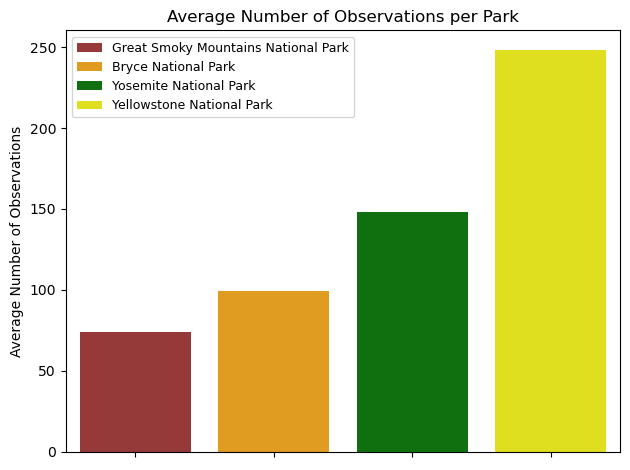

<Figure size 640x480 with 0 Axes>

In [24]:
labels = avg_obs_park['park_name']
colors = ['brown', 'orange', 'green', 'yellow']
ax = sns.barplot(x = x_values, y = y_values, data = avg_obs_park, label = labels,  palette = colors)
ax.set_xticklabels([])
ax.set(xlabel = None)
plt.title('Average Number of Observations per Park')
plt.ylabel('Average Number of Observations')
plt.legend(loc = 'best', fontsize = 9)
plt.tight_layout()
plt.show()
plt.clf()

In [25]:
print('The number of observations per plant across all parks is ' + str(avg_obs_all) + '. The park with the lowest average number of observations is the Great Smoky Mountains National Park, with an average of 74.0. The park with the highest number of observations is Yellowstone National Park, with an average of 248.0 observations.') 

The number of observations per plant across all parks is 142.0. The park with the lowest average number of observations is the Great Smoky Mountains National Park, with an average of 74.0. The park with the highest number of observations is Yellowstone National Park, with an average of 248.0 observations.


In [26]:
#Which species have the most observations for each park? What about across all parks?

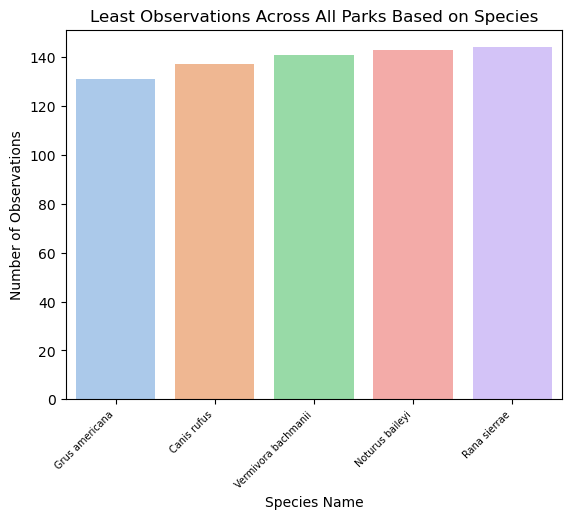

<Figure size 640x480 with 0 Axes>

In [27]:
species_data = plant_data.groupby('scientific_name')['observations'].sum().sort_values().reset_index()
x_values = species_data.scientific_name[:5]
y_values = species_data.observations[:5]
sns.barplot(x = x_values, y = y_values, data = species_data, palette = 'pastel')
plt.title('Least Observations Across All Parks Based on Species')
plt.xlabel('Species Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
plt.show()
plt.clf()

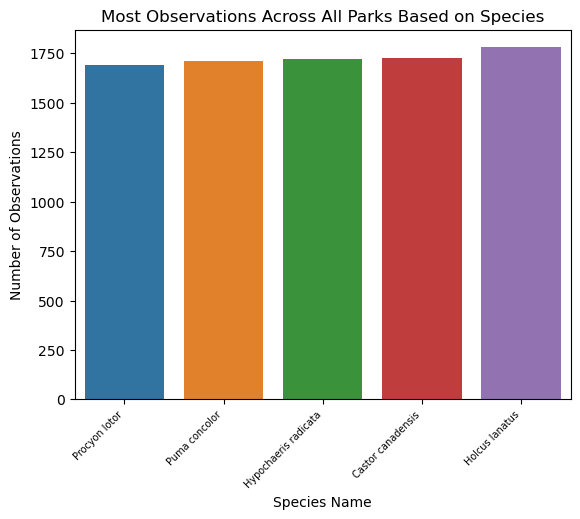

<Figure size 640x480 with 0 Axes>

In [28]:
species_data = plant_data.groupby('scientific_name')['observations'].sum().sort_values().reset_index()
x_values = species_data.scientific_name[-5:]
y_values = species_data.observations[-5:]
sns.barplot(x = x_values, y = y_values, data = species_data)
plt.title('Most Observations Across All Parks Based on Species')
plt.xlabel('Species Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
plt.show()
plt.clf()

In [29]:
park_names = ['Great Smoky Mountains National Park', 'Bryce National Park', 'Yosemite National Park', 'Yellowstone National Park']

In [30]:
def obs_per_park_min(park_name):
    species_data = plant_data[plant_data.park_name == park_name]
    species_data = species_data.groupby('scientific_name')['observations'].sum().sort_values().reset_index()
    x_values = species_data.scientific_name[:5]
    y_values = species_data.observations[:5]
    sns.barplot(x = x_values, y = y_values, data = species_data, palette = 'bright')
    plt.title('Least Observations at ' + str(park_name) + ' Based on Species', fontsize = 8)
    plt.xlabel('Species Name')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
    plt.tight_layout(pad = 7.0)

In [31]:
def obs_per_park_max(park_name):
    species_data = plant_data[plant_data.park_name == park_name]
    species_data = species_data.groupby('scientific_name')['observations'].sum().sort_values().reset_index()
    x_values = species_data.scientific_name[-5:]
    y_values = species_data.observations[-5:]
    sns.barplot(x = x_values, y = y_values, data = species_data, palette = 'dark')
    plt.title('Most Observations at ' + str(park_name) + ' Based on Species', fontsize = 8)
    plt.xlabel('Species Name')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
    plt.tight_layout(pad = 7.0)

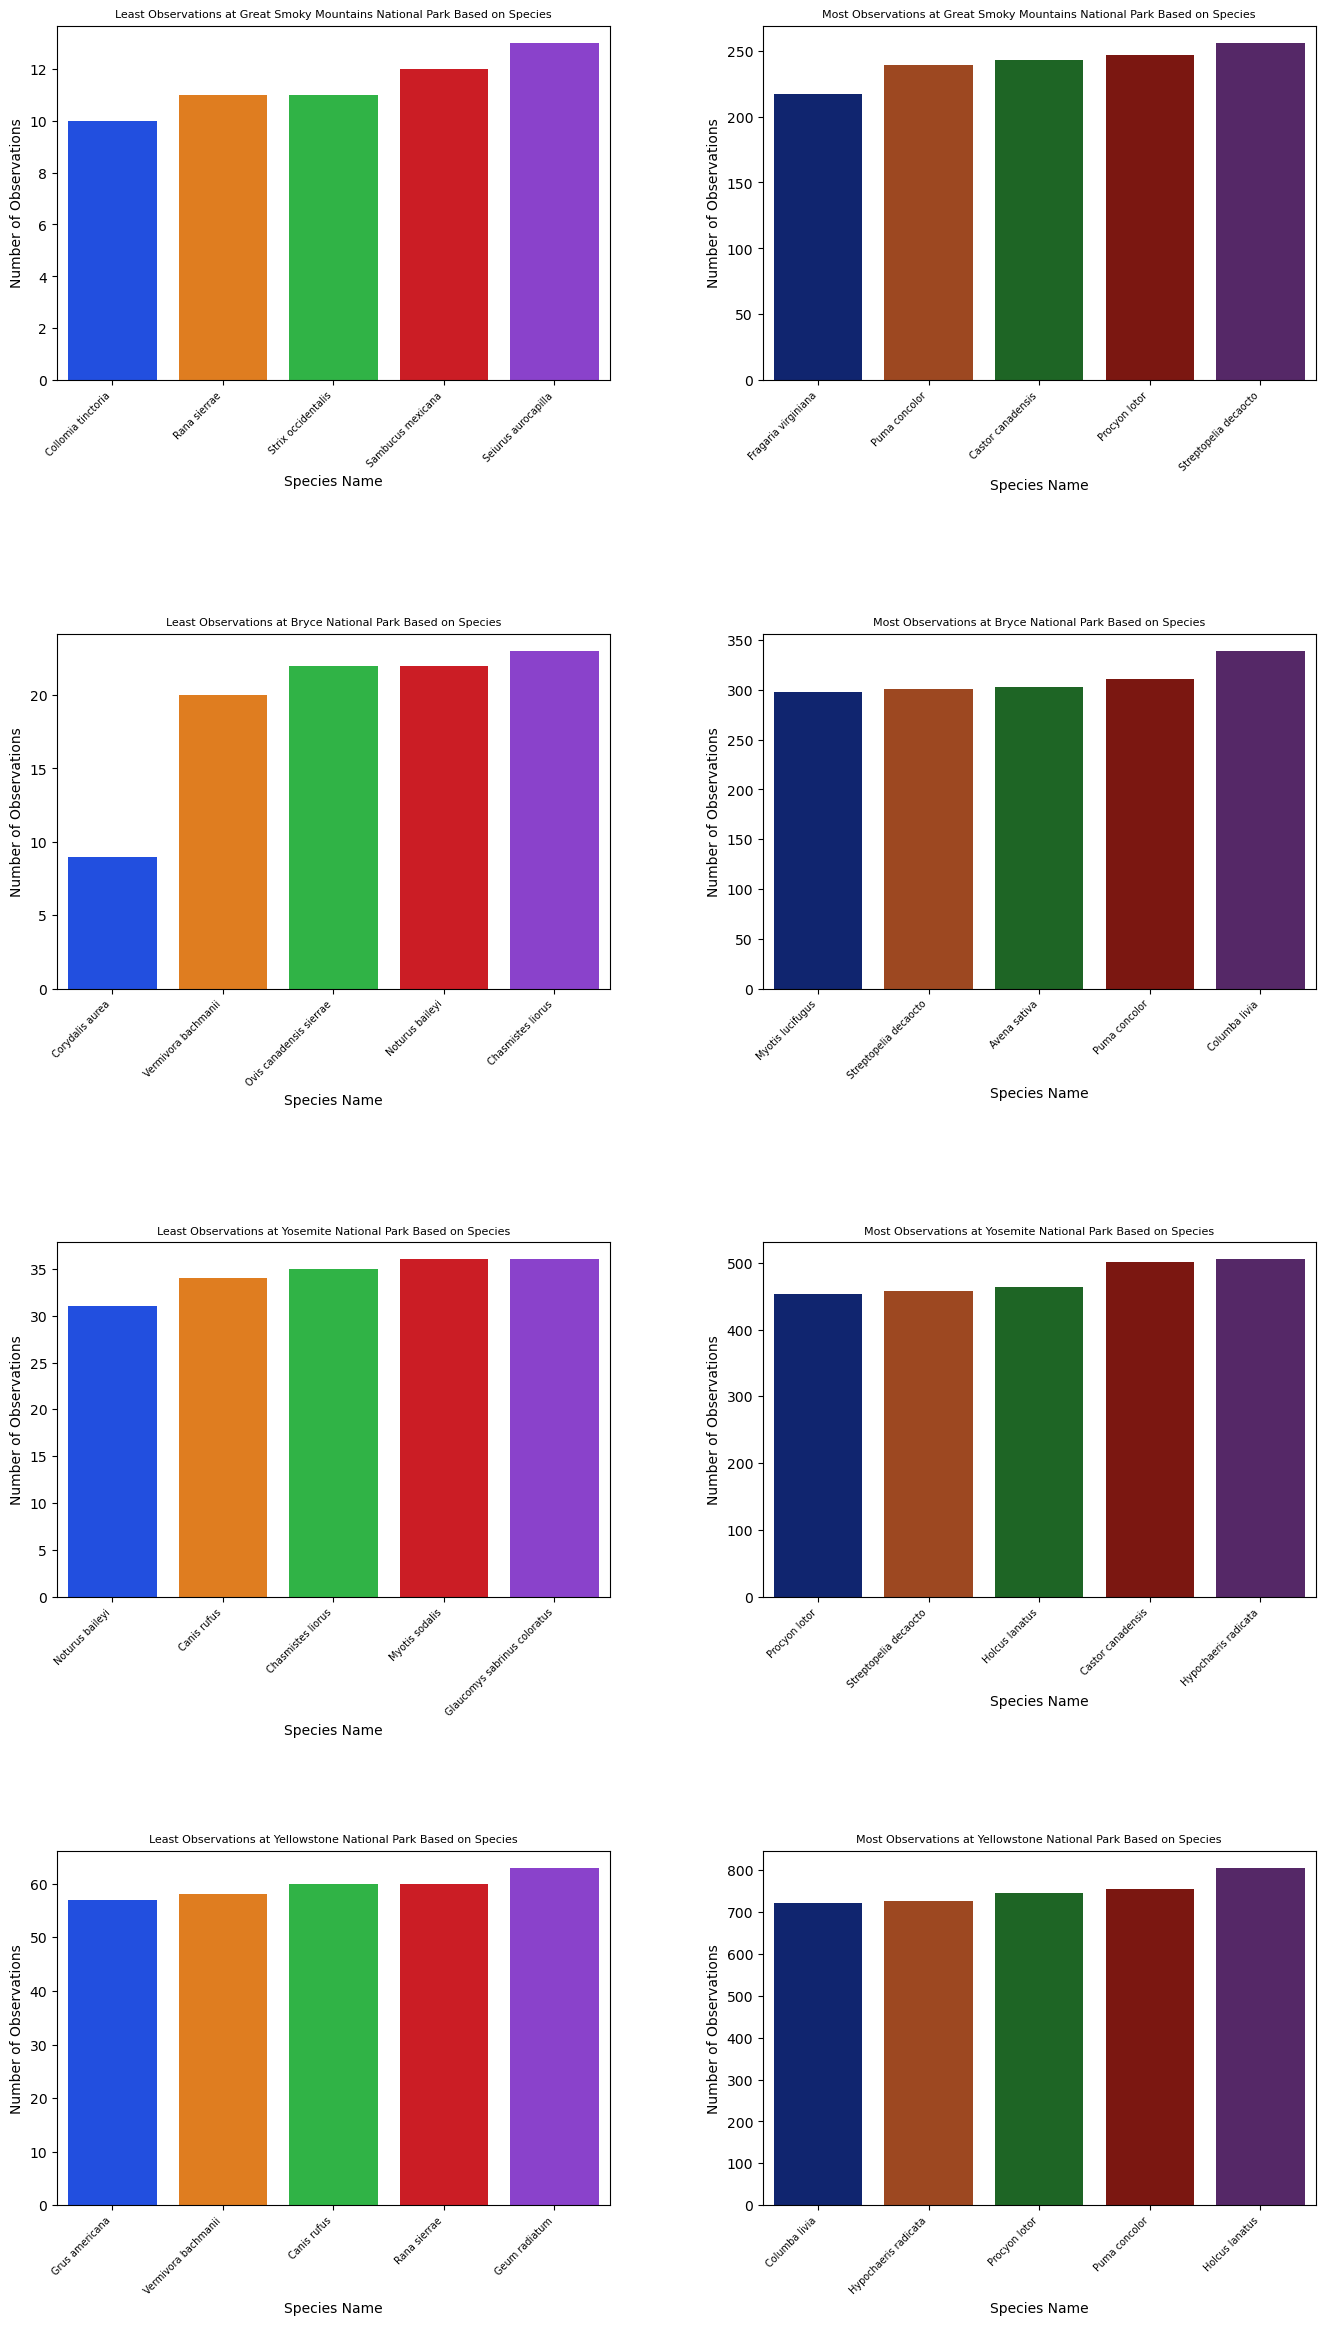

<Figure size 640x480 with 0 Axes>

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))
count = 0
for i in park_names:
    count += 1
    plt.subplot(4, 2, count)
    obs_per_park_min(i)
    count += 1
    plt.subplot(4, 2, count)
    obs_per_park_max(i)
plt.show()
plt.clf()

In [33]:
# Which genus’ contain the most and least observations for each park? What about across all parks?

In [34]:
plant_data['plant_genus'] = plant_data['scientific_name'].str.split(expand = True)[0]

In [35]:
plant_data['plant_species'] = plant_data['scientific_name'].str.split(expand = True)[1]

In [36]:
plant_data.reset_index(inplace = True)

In [37]:
genus_obs_all = plant_data.groupby('plant_genus')['observations'].sum()
genus_obs_all = genus_obs_all.sort_values().reset_index()

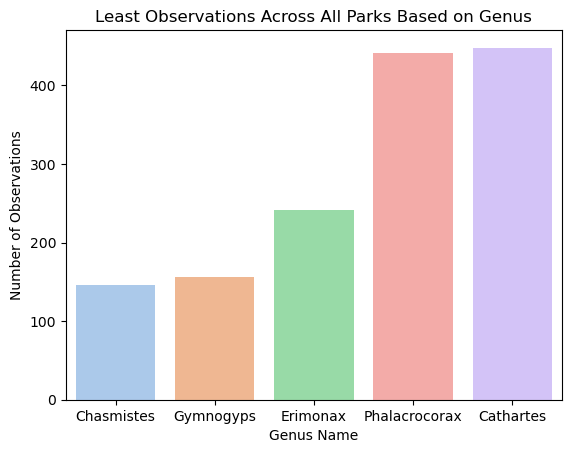

<Figure size 640x480 with 0 Axes>

In [38]:
y_values = genus_obs_all['observations'][:5]
x_values = genus_obs_all['plant_genus'][:5]
sns.barplot(x = x_values, y = y_values, data = genus_obs_all, palette = 'pastel')
plt.title('Least Observations Across All Parks Based on Genus')
plt.xlabel('Genus Name')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

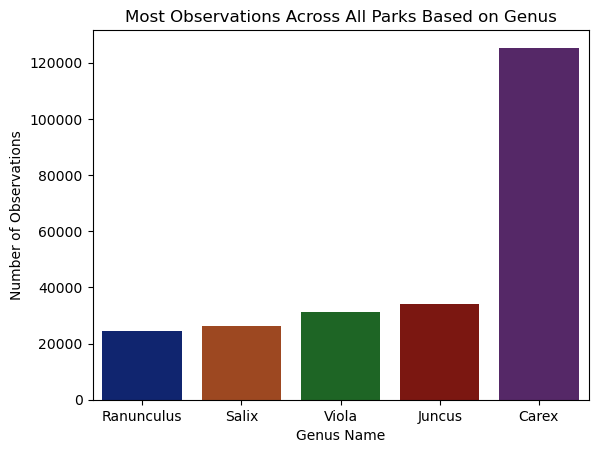

<Figure size 640x480 with 0 Axes>

In [39]:
y_values = genus_obs_all['observations'][-5:]
x_values = genus_obs_all['plant_genus'][-5:]
sns.barplot(x = x_values, y = y_values, data = genus_obs_all, palette = 'dark')
plt.title('Most Observations Across All Parks Based on Genus')
plt.xlabel('Genus Name')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

In [40]:
def park_genus_min(park_name):
    park_plant_data = plant_data[plant_data.park_name == park_name]
    park_plant_data = park_plant_data.groupby('plant_genus')['observations'].sum().sort_values().reset_index()
    x_values_min = park_plant_data.plant_genus[:5]
    y_values_min = park_plant_data.observations[:5]
    sns.barplot(x = x_values_min, y = y_values_min, data = park_plant_data, palette = 'bright')
    plt.title('Least Observations at ' + str(park_name) + ' Based on Genus', fontsize = 9) 
    plt.xlabel('Genus Name')
    plt.ylabel('Observations')
    plt.tight_layout(pad = 7.0)

In [41]:
def park_genus_max(park_name):
    park_plant_data = plant_data[plant_data.park_name == park_name]
    park_plant_data = park_plant_data.groupby('plant_genus')['observations'].sum().sort_values().reset_index()
    x_values_max = park_plant_data.plant_genus[-5:]
    y_values_max = park_plant_data.observations[-5:]
    sns.barplot(x = x_values_max, y = y_values_max, data = park_plant_data, palette = 'dark')
    plt.title('Most Observations at ' + str(park_name) + ' Based on Genus', fontsize = 9) 
    plt.xlabel('Genus Name')
    plt.ylabel('Observations')
    plt.tight_layout(pad = 7.0)

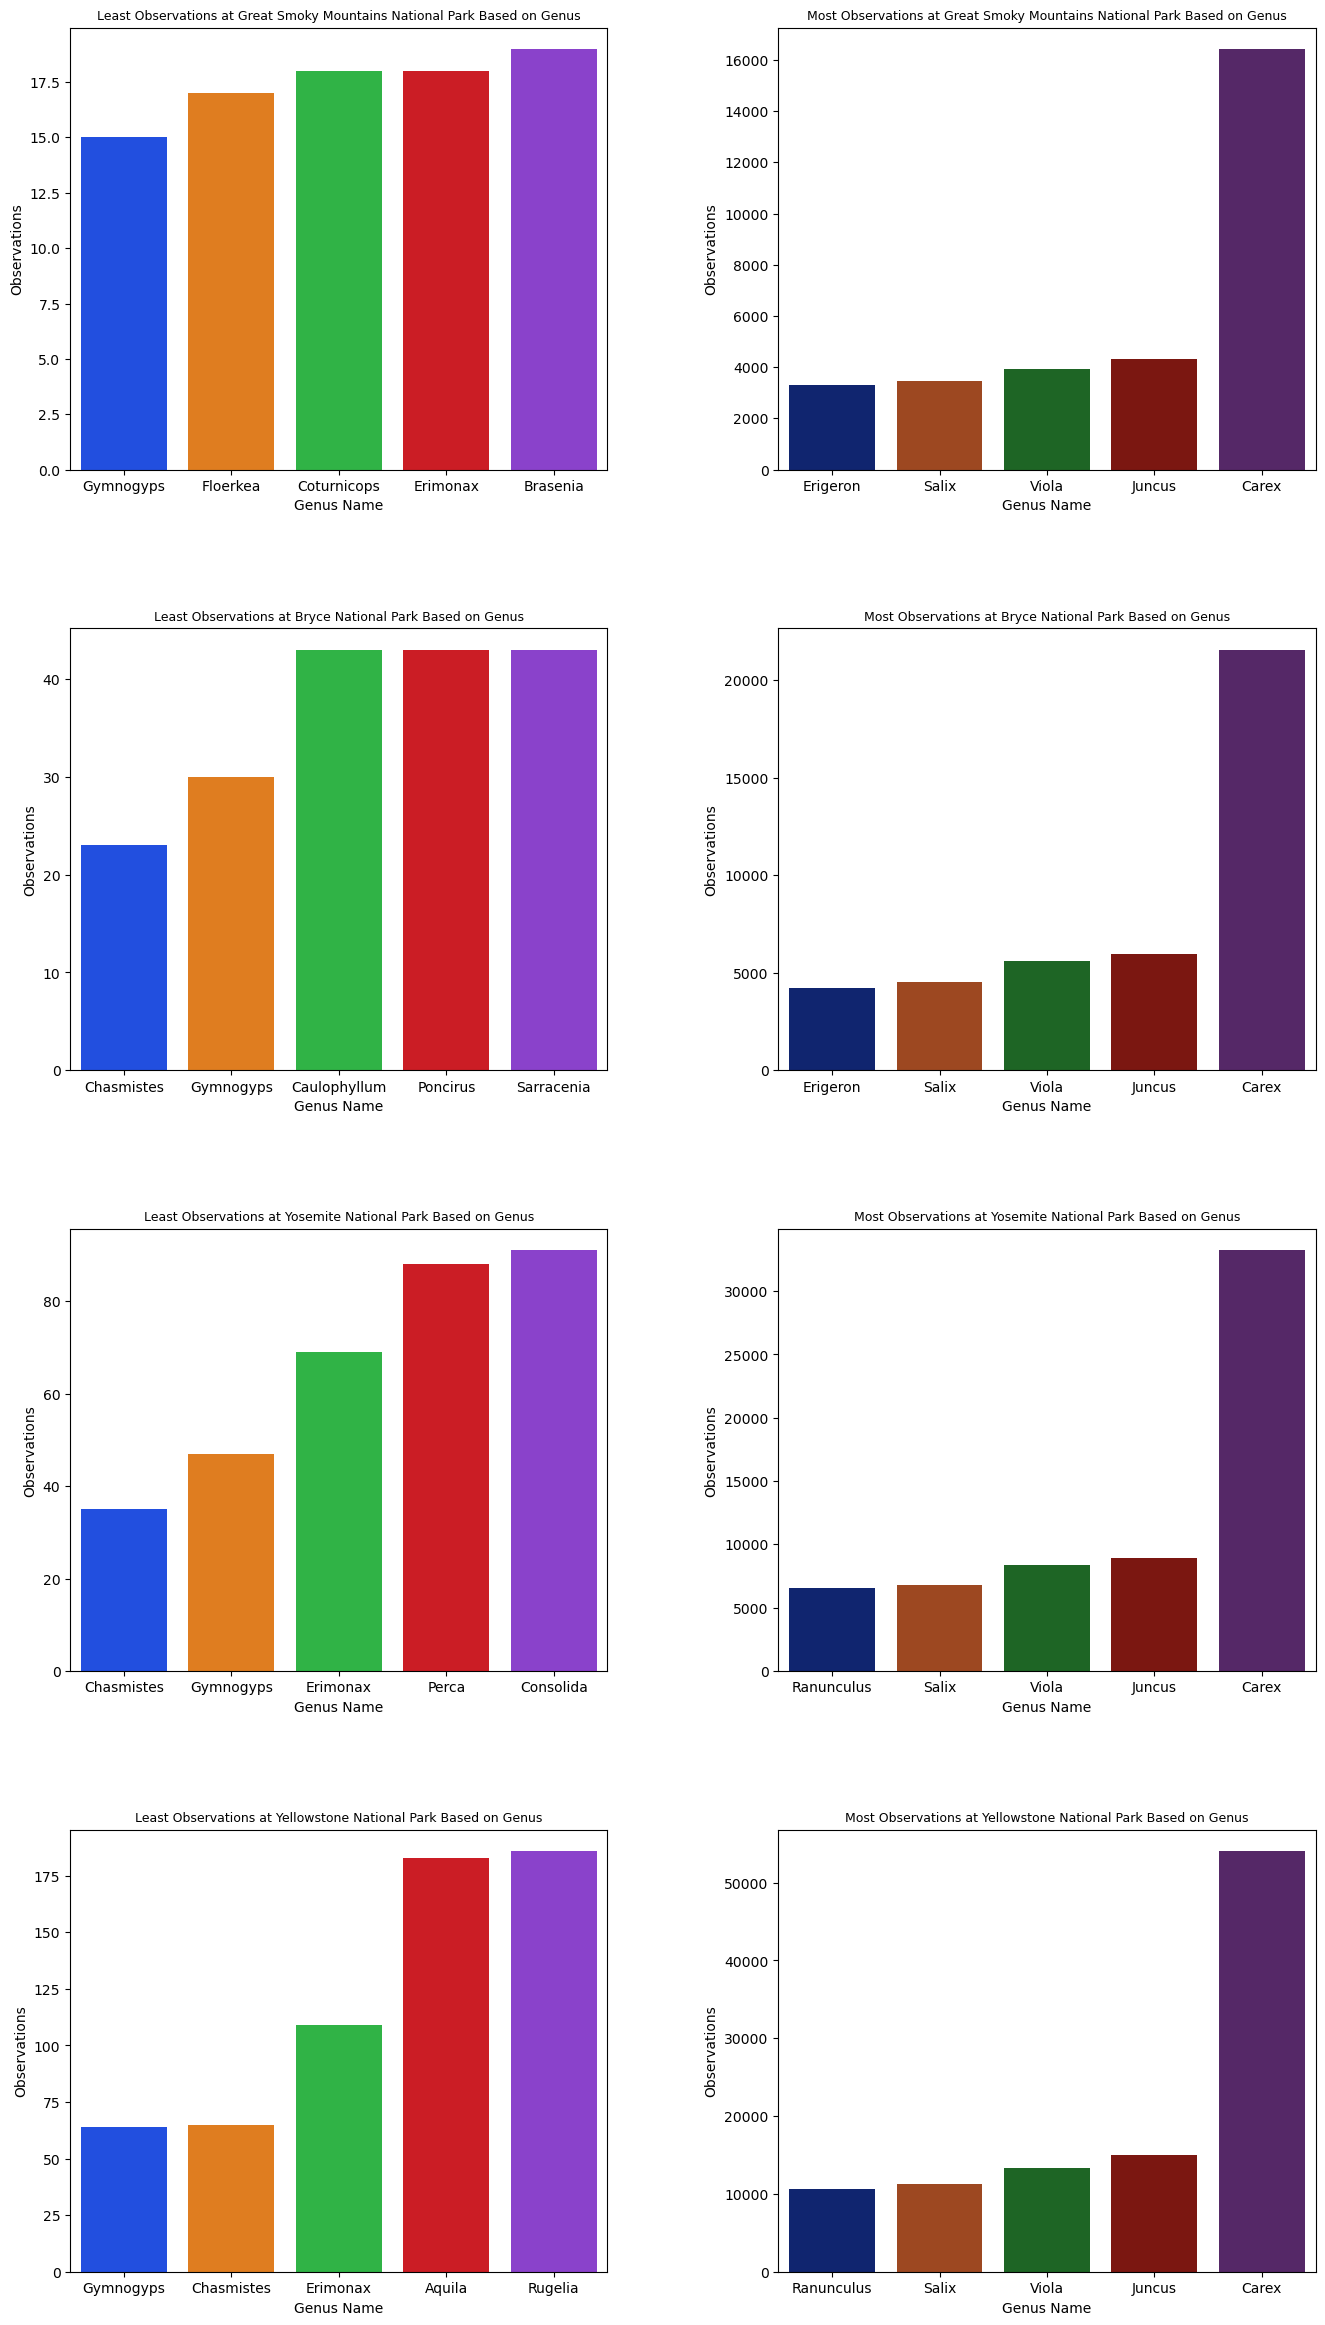

<Figure size 640x480 with 0 Axes>

In [42]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))
count = 0
for i in park_names:
    count += 1
    plt.subplot(4, 2, count)
    park_genus_min(i)
    count += 1
    plt.subplot(4, 2, count)
    park_genus_max(i)
plt.show()
plt.clf()

In [43]:
# Which genus’ appear most frequently (have the most unique species) and least frequently for each park? What about across all parks?

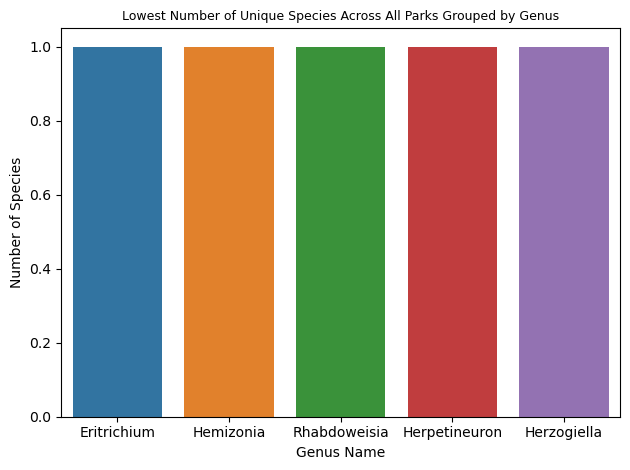

<Figure size 640x480 with 0 Axes>

In [44]:
genus_species_count_ovr = plant_data.groupby('plant_genus')['scientific_name'].nunique().sort_values().reset_index()
x_values_low = genus_species_count_ovr.plant_genus[:5]
y_values_low = genus_species_count_ovr.scientific_name[:5]
sns.barplot(x = x_values_low, y = y_values_low, data = genus_species_count_ovr )
plt.title('Lowest Number of Unique Species Across All Parks Grouped by Genus', fontsize = 9)
plt.xlabel('Genus Name')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()
plt.clf()

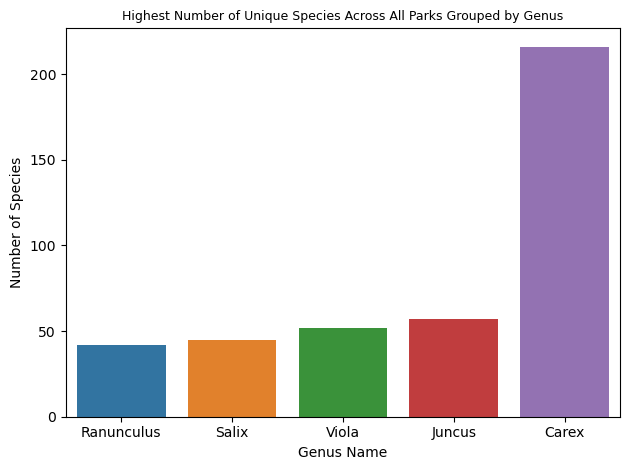

<Figure size 640x480 with 0 Axes>

In [45]:
genus_species_count_ovr = plant_data.groupby('plant_genus')['scientific_name'].nunique().sort_values().reset_index()
x_values_high = genus_species_count_ovr.plant_genus[-5:]
y_values_high = genus_species_count_ovr.scientific_name[-5:]
sns.barplot(x = x_values_high, y = y_values_high, data = genus_species_count_ovr )
plt.title('Highest Number of Unique Species Across All Parks Grouped by Genus', fontsize = 9)
plt.xlabel('Genus Name')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()
plt.clf()

In [46]:
def park_species_min(park_name):
    park_plant_data = plant_data[plant_data.park_name == park_name]
    park_plant_data = park_plant_data.groupby('plant_genus')['scientific_name'].nunique().sort_values().reset_index()
    x_values_min = park_plant_data.plant_genus[:5]
    y_values_min = park_plant_data.scientific_name[:5]
    sns.barplot(x = x_values_min, y = y_values_min, data = park_plant_data, palette = 'bright')
    plt.title('Least Number of Unique Species at ' + str(park_name) + ' Grouped by Genus', fontsize = 8)
    plt.xlabel('Genus Name')
    plt.ylabel('Number of Unique Species')
    plt.tight_layout(pad = 7.0)

In [47]:
def park_species_max(park_name):
    park_plant_data = plant_data[plant_data.park_name == park_name]
    park_plant_data = park_plant_data.groupby('plant_genus')['scientific_name'].nunique().sort_values().reset_index()
    x_values_max = park_plant_data.plant_genus[-5:]
    y_values_max = park_plant_data.scientific_name[-5:]
    sns.barplot(x = x_values_max, y = y_values_max, data = park_plant_data, palette = 'dark')
    plt.title('Greatest Number of Unique Species at ' + str(park_name) + ' Grouped by Genus', fontsize = 8)
    plt.xlabel('Genus Name')
    plt.ylabel('Number of Unique Species')
    plt.tight_layout(pad = 7.0)

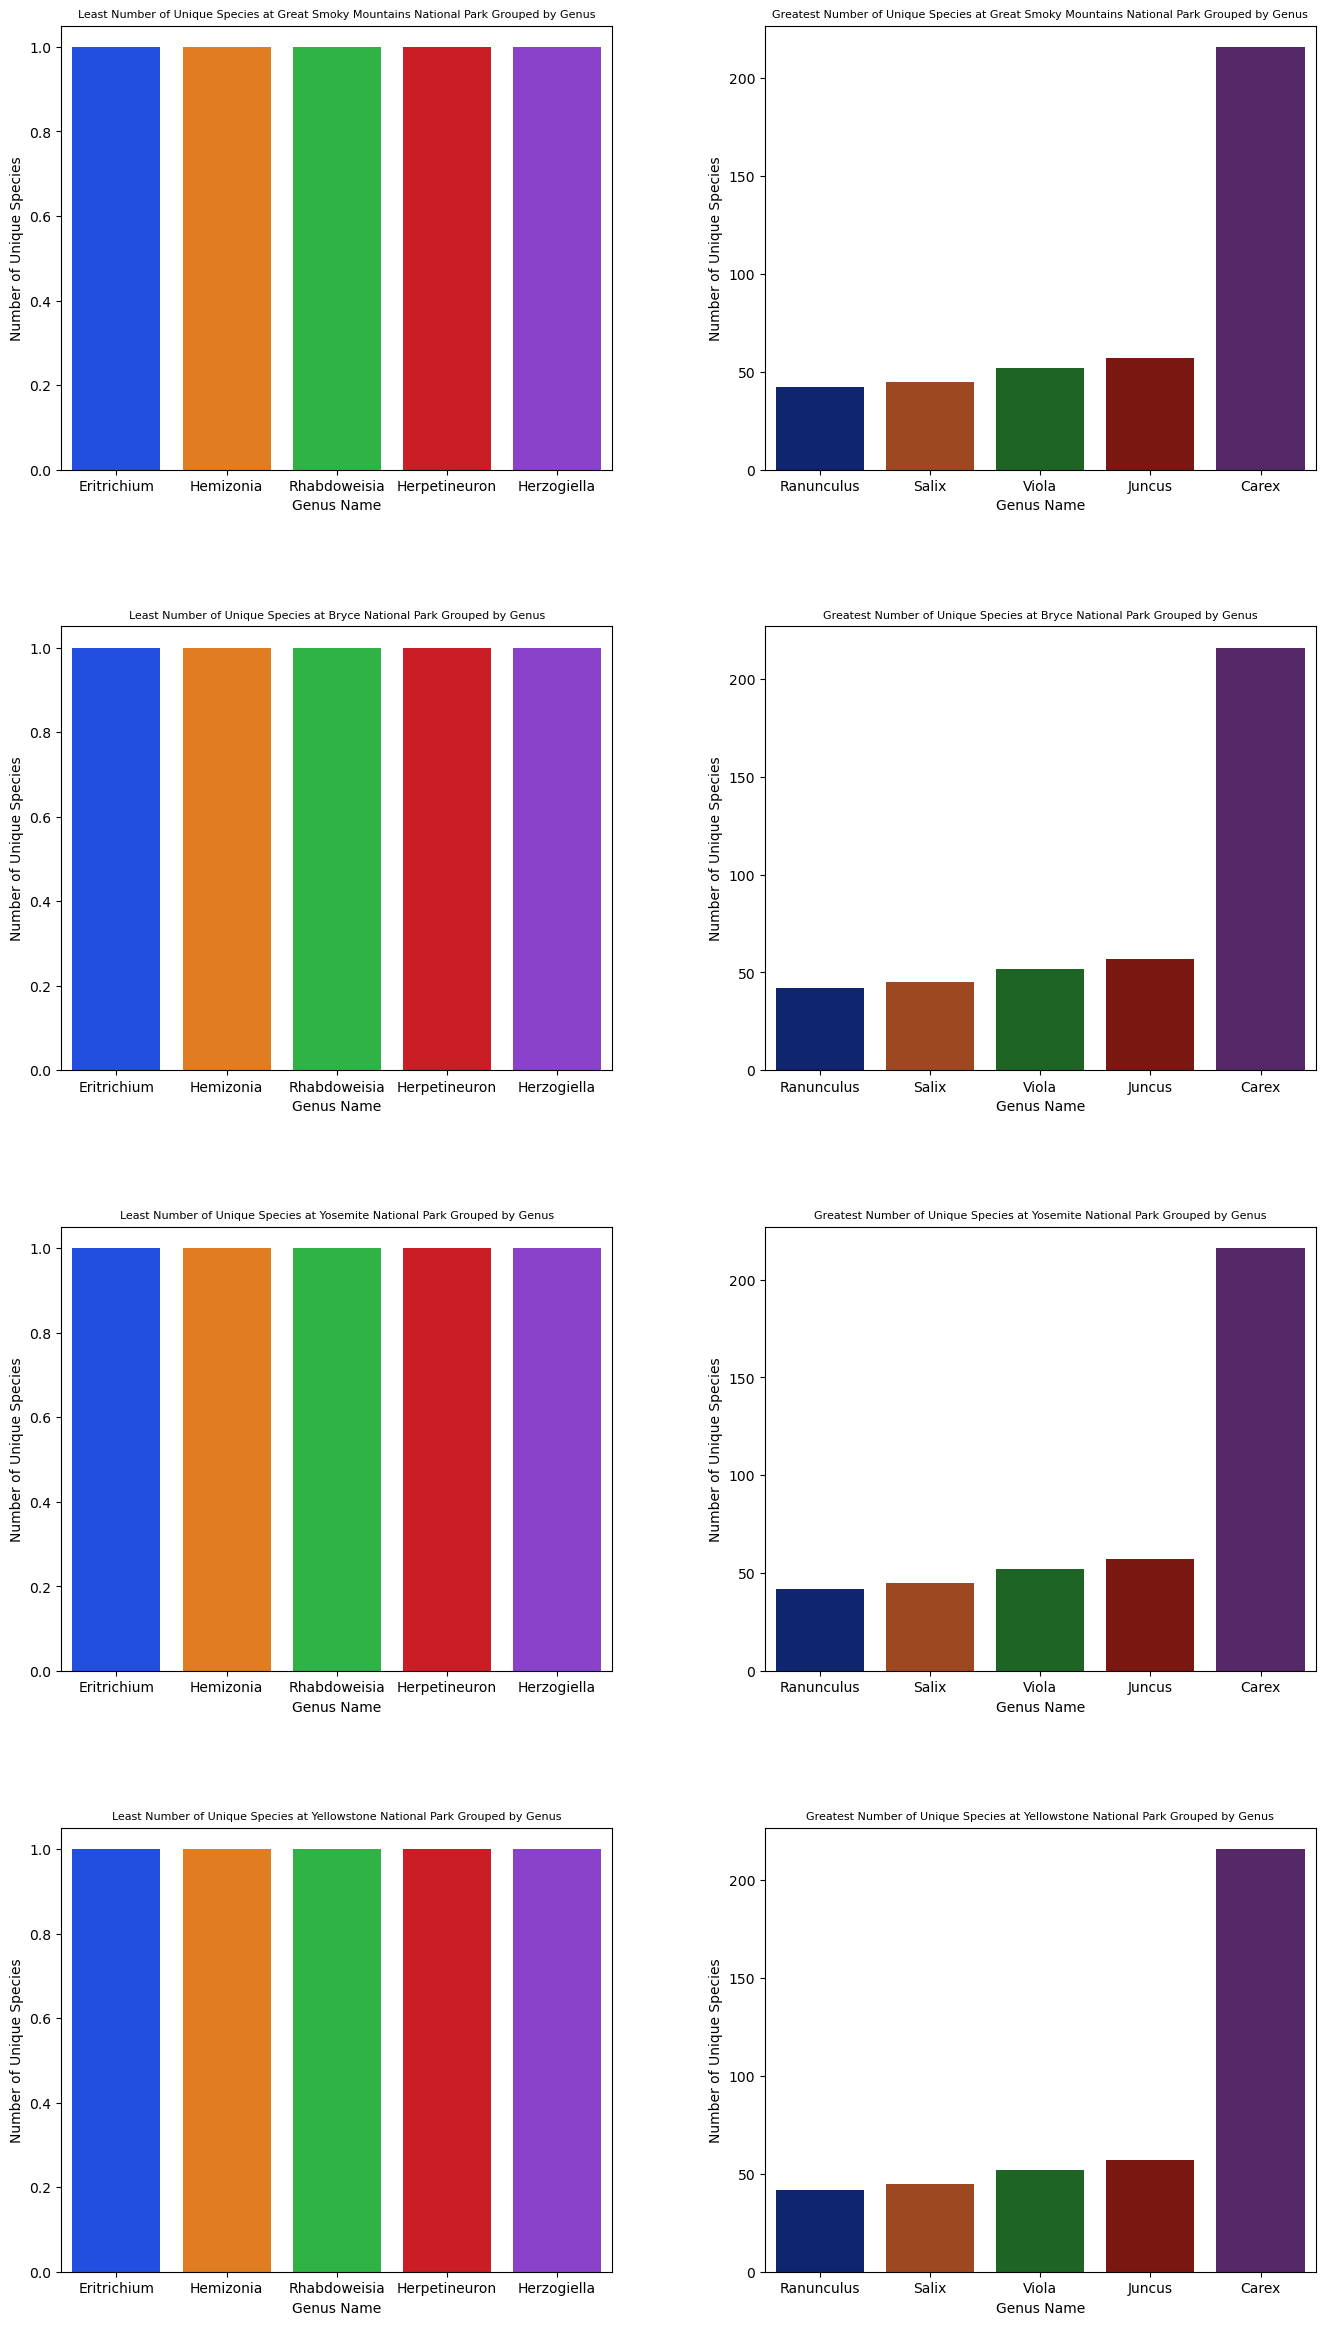

<Figure size 640x480 with 0 Axes>

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))
count = 0
for i in park_names:
    count += 1
    plt.subplot(4, 2, count)
    park_species_min(i)
    count += 1
    plt.subplot(4, 2, count)
    park_species_max(i)
plt.show()
plt.clf()

In [49]:
#Create a function that compares the total number of species belonging to a genus for each park given the genus name.

In [50]:
def species_based_on_genus(genus_name):
    total_species_genus = plant_data[plant_data.plant_genus == genus_name]
    total_species_genus = total_species_genus.groupby('park_name')['scientific_name'].nunique().sort_values().reset_index()
    x_values = total_species_genus['park_name']
    y_values = total_species_genus['scientific_name']
    sns.barplot(x = x_values, y = y_values, data = total_species_genus)
    plt.title('Number of Unique Species for ' + str(genus_name) + ' Grouped by Park')
    plt.xlabel('Park Name')
    plt.xticks(rotation = 45, ha = 'right')
    plt.ylabel('Number of Species')
    plt.show()
    plt.clf()

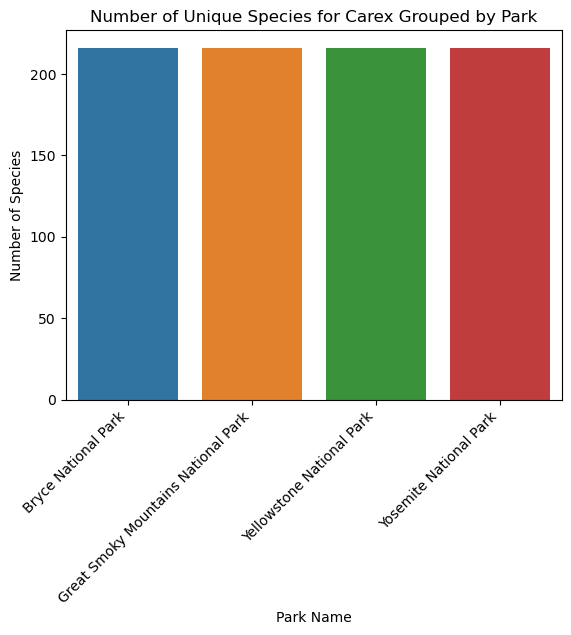

<Figure size 640x480 with 0 Axes>

In [51]:
# Test function
species_based_on_genus('Carex')

In [52]:
# Create a function that compares the number of observations for each park given the genus name.

In [53]:
def park_species_obs(genus_name):
    plant_info = plant_data[plant_data.plant_genus == 'Carex']
    total_genus = plant_info.groupby('park_name')['observations'].sum().sort_values().reset_index()
    x_values = total_genus['park_name']
    y_values = total_genus['observations']
    sns.barplot(x = x_values, y = y_values, data = total_genus, palette = 'dark')
    plt.title('Observations of ' + str(genus_name) + ' at Each Park ', fontsize = 7)
    plt.ylabel('Number of Observations')
    plt.xlabel('Park Name')
    plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
    plt.show()
    plt.clf()

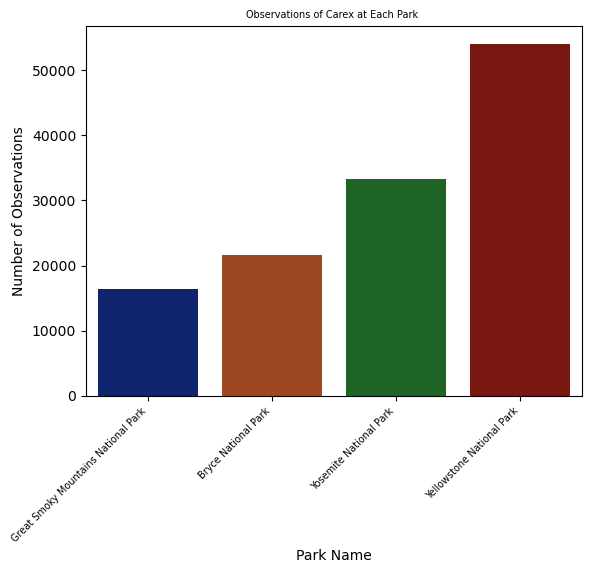

<Figure size 640x480 with 0 Axes>

In [54]:
# Test function
park_species_obs('Carex')